In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims_nd2
from pims_nd2 import ND2_Reader
import trackpy as tp
import os
from cellpose import models,io
from skimage.io import imread
from scipy.stats import linregress

In [2]:
nuc_model = '/gpfs/scratch/denesl01/libLTD/CP_20220513_192756'
working_dir = '/gpfs/home/denesl01/scratch/20221107_GEM_osmo'
working_dir = '/gpfs/scratch/denesl01/20221215_diff_GEMs'
model = models.CellposeModel(pretrained_model=nuc_model) 
flist = [f for f in os.listdir(working_dir) if f.endswith('.nd2')]

In [3]:
def open_nd2(input_file):
    frames = ND2_Reader(os.path.join(working_dir, input_file))
    arr_list = []
    for item in frames:
        arr_list.append(item)
    frames = np.array(arr_list)
    return frames

here, I want to make a function that can take in the filenames and produce paired nucleus/GEMs image/movies with the appropriate conditions etc from the filename as well all in one dictionary 

Currently, this is setup to save a sample list table in the directory in which the files are, it can be altered as needed until a common format is reached

working_dir = '/gpfs/scratch/denesl01/20221215_diff_GEMs'
for processing this one^

In [25]:
sampledict = {}
for f in flist:
    time, diff, condition, sample = f.split('_')
    sample = int(sample.split('.')[0])
    time = int(time)
    if sample%2 != 0:
        gem_file = f
        nuc_file = '_'.join([str(time),diff,condition,f"{sample+1:03d}"])+'.nd2'
        sampledict[f] = [time, diff, condition, sample, nuc_file, gem_file]
df = pd.DataFrame(sampledict).T
df.columns = ['time', 'diff', 'condition', 'sample', 'nuc_file', 'gem_file']
print(df)
df.to_csv(os.path.join(working_dir, 'file_list.csv'))

                time diff condition sample         nuc_file         gem_file
48_O_S_013.nd2    48    O         S     13   48_O_S_014.nd2   48_O_S_013.nd2
24_OM_S_001.nd2   24   OM         S      1  24_OM_S_002.nd2  24_OM_S_001.nd2
24_C_D_007.nd2    24    C         D      7   24_C_D_008.nd2   24_C_D_007.nd2
2_O_D_007.nd2      2    O         D      7    2_O_D_008.nd2    2_O_D_007.nd2
6_C_S_019.nd2      6    C         S     19    6_C_S_020.nd2    6_C_S_019.nd2
...              ...  ...       ...    ...              ...              ...
6_C_D_001.nd2      6    C         D      1    6_C_D_002.nd2    6_C_D_001.nd2
48_C_D_009.nd2    48    C         D      9   48_C_D_010.nd2   48_C_D_009.nd2
2_A_D_003.nd2      2    A         D      3    2_A_D_004.nd2    2_A_D_003.nd2
48_O_S_017.nd2    48    O         S     17   48_O_S_018.nd2   48_O_S_017.nd2
12_OM_D_003.nd2   12   OM         D      3  12_OM_D_004.nd2  12_OM_D_003.nd2

[600 rows x 6 columns]


In [30]:
sampledict = {}
for f in flist:
    sample_num = int(f.split('.nd2')[0][-3:])
    if sample_num%2 != 0:
        nuc_image = f
        gem_image = f.split('.nd2')[0][:-3]+f"{sample_num+1:03}"+'.nd2'
        try:
            time,condition,sample = f.split('_')
            sample = sample.split('.')[0]
        except:
            print('except', f)
            time = 'T0'
            condition = 'c0'
            sample = f.split('_')[-1].split('.')[0]
        sampledict[f] = [time, condition, sample, nuc_image, gem_image]

df = pd.DataFrame(sampledict).T
df.columns = ['time', 'condition', 'sample', 'nuc_file', 'gem_file']
df.to_csv(os.path.join(working_dir,'file_list.csv'))

except control_009.nd2
except control_011.nd2
except control_001.nd2
except control_003.nd2
except control_005.nd2
except control_007.nd2


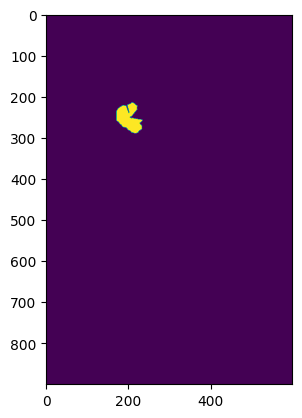

In [29]:
nuc = open_nd2(df.iloc[0]['nuc_file'])[0,:,:]

masks, flows, styles = model.eval(nuc, diameter=120)
#io.masks_flows_to_seg(nuc, masks, flows, 120, 'a', [0]) 
nuc_mask = np.where(masks>0, 1, 0)
plt.imshow(nuc_mask)
plt.show()